# Vary N

This notebook explores the effect of changing the number of beads of a polymer chain on density functional theory (DFT) predictions of different thermophysical properties, such as interfacial tension and solubility, using the $N$ parameter in PC-SAFT. The models we explore are based on PC-SAFT and DFT and were largely developed by Dr. Huikuan Chao. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import dataproc
import plot

from importlib import reload

# System parameters
# molecular weight of CO2
mw_co2 = 44.01
# conversion of m3 per mL
m3_per_mL = 1E-6
# Save plots?
save_plots = True
# file path to saved data
data_folder = '../g-adsa_results/'
# folder of csv data files for DFT predictions of interfacial tension
dft_data_folder = 'dft_pred/N2f/60c/'

## Plot DFT Predictions

Below, we plot how the DFT prediciton changes with $N$, the number of beads in the PC-SAFT model. We assume a difunctional (2f) polymer, such as PPG, with PC-SAFT parameters of $\sigma$ = 3.01 A, $\epsilon$ = 229 $k_B$, and $k_{ij} = 2.7 \times 10^{-4} T - 8.2 \times 10^{-2}$ (where $T$ is in Kelvin).

Before plotting the results of the sensitivity analysis, we run `extract_dft_if_tension.ipynb` to extract the interfacial tension data from the DFT results and format it (along with the solubility and other properties) in a simple .csv file for reading in the following functions.

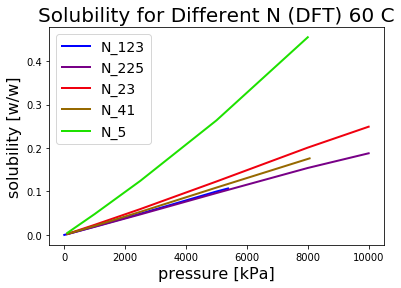

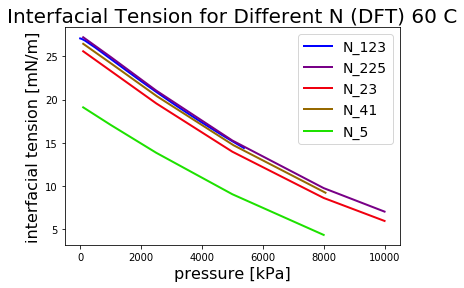

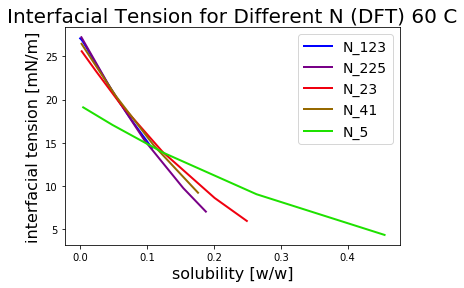

In [5]:
reload(dataproc)
reload(plot)

# loads dft predictions into a similarly structured dictionary
d_dft = dataproc.load_dft(dft_data_folder)

ax = plot.dft(d_dft, 'p', 'solub', 'pressure [kPa]', 'solubility [w/w]', 'Solubility for Different N (DFT) 60 C')

ax = plot.dft(d_dft, 'p', 'if_tension', 'pressure [kPa]', 'interfacial tension [mN/m]', 
              'Interfacial Tension for Different N (DFT) 60 C')

ax = plot.dft(d_dft, 'solub', 'if_tension', 'solubility [w/w]', 'interfacial tension [mN/m]', 
              'Interfacial Tension for Different N (DFT) 60 C')

The DFT prediction for the solubility contradicts results from Yang et al. (2019), which found that the solubility increases as molar mass increases from 256-1000 g/mol ($N$ from 13 to 45). The DFT prediction for the interfacial tension also contradicts their results, which found that increasing the molar mass decreased the interfacial tension (although this is probably because in their findings, increasing molar mass increased solubility of CO2).

Plot as a function of $N$.

In [3]:
p_list = [500, 2500, 5000] # pressure [kPa]
N_list = np.sort([int(s.split('_')[1]) for s in d_dft.keys()])
d_N = {}

for p in p_list:
    p_tag = 'p = {0:d} kPa'.format(p)
    d_N[p_tag] = {}
    d_N[p_tag]['N'] = N_list
    d_N[p_tag]['solub'] = []
    d_N[p_tag]['if_tension'] = []
    for N in N_list:
        tag = 'N_{0:d}'.format(N)
        d_N[p_tag]['solub'] += [np.interp(p, d_dft[tag]['p'], d_dft[tag]['solub'])]
        d_N[p_tag]['if_tension'] += [np.interp(p, d_dft[tag]['p'], d_dft[tag]['if_tension'])]

IndexError: list index out of range

In [ ]:
ax = plot.dft(d_N, 'N', 'solub', 'N [beads]', 'solubility [w/w]', 'Solubility for Different N (DFT) 60 C')
ax.set_xscale('log')
ax.set_yscale('log')

ax = plot.dft(d_N, 'N', 'if_tension', 'N [beads]', 'interfacial tension [w/w]', 'Interfacial Tension for Different N (DFT) 60 C')

At 60 C, the new values of $\epsilon$ and $\sigma$ still result in an accurate prediction of the solubility. The interfacial tension prediction is very slightly higher than before, and might be less accurate at high pressures.**TEST THIS** The prediction for the specific volume also improved over the prediction using the values fitted to the solubility, but the qualitative trend (monotonically decreasing instead of convex followed by monotonic increase) is still incorrect.